# Analisis explotario de datos (EDA), para la construcción de un modelo de clasificación binaria.
## Author: Ronald Barberi (KretoN)

[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](&copy)

### Nota: Emplearemos la libreria generada para ciencia/analisis de datos 'statistics_dt_scientist_pd', la cual podrás encontrar en utils, o [aquí](&copy)

### Importar librerias

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

### Inicializamos variables globales para el modelo.

In [2]:
path_main = os.getcwd()
dic_args = {
    'path_data_itau': os.path.join(path_main, '..', 'data', 'tj_clients.csv'),
    'path_data_itau_lbl': os.path.join(path_main, '..', 'data', 'tj_label.csv'),
    'path_data_out': os.path.join(path_main, '..', 'data', 'data_clear_mdl.csv'),
}

### Ajustamos configuraciones visuales para los DataFrame con Pandas

In [3]:
pd.set_option('display.max_rows', None) # mostrar todas las filas
pd.set_option('display.max_columns', None) # mostrar todas las columnas
pd.set_option('display.width', 1_000) # ancho máximo de línea
pd.set_option('display.colheader_justify', 'center')  # centrar nombres de columnas

### Generamos DataFrame con información del cliente.
Adicionalmente se asigna el tipo de dato correspondiente por columna para optimo rendimiento y se le realiza limpieza y estandarización a los nombres de las columnas.

In [4]:
schema_data_itau = {
    'Ind_ID': 'int64',
    'GENDER': 'category',
    'Car_Owner': 'category',
    'Propert_Owner': 'category',
    'CHILDREN': 'int8',
    'Annual_income': 'Float64',
    'Type_Income': 'category',
    'EDUCATION': 'category',
    'Marital_status': 'category',
    'Housing_type': object,
    'Birthday_count': 'Float64',
    'Employed_days': 'int64',
    'Mobile_phone': 'int8',
    'Work_Phone': 'int8',
    'Phone': 'int8',
    'EMAIL_ID': 'int8',
    'Type_Occupation': object,
    'Family_Members': 'int8',
}

df_itau = pd.read_csv(dic_args['path_data_itau'], dtype=schema_data_itau)

df_itau.columns = [col.strip().lower().replace(' ', '_') for col in df_itau.columns]

df_itau.info()
df_itau.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ind_id           1548 non-null   int64   
 1   gender           1541 non-null   category
 2   car_owner        1548 non-null   category
 3   propert_owner    1548 non-null   category
 4   children         1548 non-null   int8    
 5   annual_income    1525 non-null   Float64 
 6   type_income      1548 non-null   category
 7   education        1548 non-null   category
 8   marital_status   1548 non-null   category
 9   housing_type     1548 non-null   object  
 10  birthday_count   1526 non-null   Float64 
 11  employed_days    1548 non-null   int64   
 12  mobile_phone     1548 non-null   int8    
 13  work_phone       1548 non-null   int8    
 14  phone            1548 non-null   int8    
 15  email_id         1548 non-null   int8    
 16  type_occupation  1060 non-null   object  


,ind_id,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,<NA>,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,<NA>,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


### Se genera el segundo DataFrame con la información de que clientes si han utilizado la tarjeta.
También se le asigna el tipo de dato correspondiente por columna para optimo rendimiento y se le realiza limpieza y estandarización a los nombres de las columnas.

In [5]:
schema_data_lbl = {
    'Ind_ID': 'int64',
    'label': 'int8'
}

df_lbl = pd.read_csv(dic_args['path_data_itau_lbl'], dtype=schema_data_lbl)

df_lbl.columns = [col.strip().lower().replace(' ', '_') for col in df_lbl.columns]

df_lbl.info()
df_lbl.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ind_id  1548 non-null   int64
 1   label   1548 non-null   int8 
dtypes: int64(1), int8(1)
memory usage: 13.7 KB


,ind_id,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


### Merge de los DataFrame
Se hace un cruce entre ambos DataFrame para consolidar la información en un solo conjunto de datos.

In [6]:
df = df_itau.merge(df_lbl, on='ind_id', how='inner')

df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ind_id           1548 non-null   int64   
 1   gender           1541 non-null   category
 2   car_owner        1548 non-null   category
 3   propert_owner    1548 non-null   category
 4   children         1548 non-null   int8    
 5   annual_income    1525 non-null   Float64 
 6   type_income      1548 non-null   category
 7   education        1548 non-null   category
 8   marital_status   1548 non-null   category
 9   housing_type     1548 non-null   object  
 10  birthday_count   1526 non-null   Float64 
 11  employed_days    1548 non-null   int64   
 12  mobile_phone     1548 non-null   int8    
 13  work_phone       1548 non-null   int8    
 14  phone            1548 non-null   int8    
 15  email_id         1548 non-null   int8    
 16  type_occupation  1060 non-null   object  


,ind_id,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,<NA>,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,<NA>,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


### Verificamos el desbalanceo de nuestro DataSet

visualizamos que hay un gran desbalanceo, por lo cual se excluira de filtros a label==1, con la finalidad de no disminuir la muestra de la variable objetivo.

### Asignación de variables cualitativas y cuantitativas.
Se realiza descripción de los valores que tienen las columnas cuantitativas.

In [7]:
list_cols_cuantitatives = [
    'children','annual_income','birthday_count','employed_days',
    'mobile_phone','work_phone','phone','email_id'
]

list_cols_cualitativas = [
    'gender', 'car_owner','propert_owner','type_income',
    'education','marital_status','housing_type','type_occupation'
]

df[list_cols_cuantitatives].describe(include='all')

,children,annual_income,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id
count,1548.000000,1525.0,1526.0,1548.000000,1548.0,1548.000000,1548.000000,1548.000000
mean,0.412791,191399.32623,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377
std,0.776691,113252.997656,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651
min,0.000000,33750.0,-24946.0,-14887.000000,1.0,0.000000,0.000000,0.000000
25%,0.000000,121500.0,-19553.0,-3174.500000,1.0,0.000000,0.000000,0.000000
50%,0.000000,166500.0,-15661.5,-1565.000000,1.0,0.000000,0.000000,0.000000
75%,1.000000,225000.0,-12417.0,-431.750000,1.0,0.000000,1.000000,0.000000
max,14.000000,1575000.0,-7705.0,365243.000000,1.0,1.000000,1.000000,1.000000


### Validación valores nulos.
Se realiza la validación de valores nulos en las columnas para su imputación correspondiente.

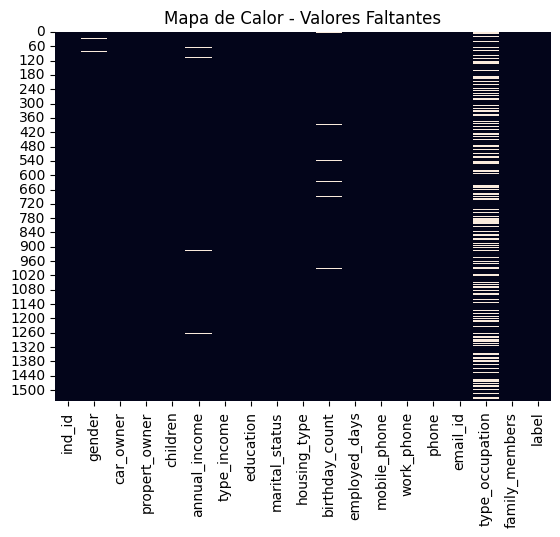

In [8]:
sns.heatmap(
    df.isnull(), cbar=False
)
plt.title('Mapa de Calor - Valores Faltantes')
plt.show()

### Función para la imputación de valores nulos.
Se genera una función para graficar la distribución de los datos, su media, mediana y coeficiente de variación.

In [9]:
def cof_variacion_input_nulls(col):
    x_barra = round(df[col].mean(), 4)
    Med = df[col].median()
    cv = round(df[col].std() / x_barra, 4)
    print(f'[OK] la media para {col} es: {x_barra}')
    print(f'[OK] la mediana para {col} es: {Med}')
    print(f'[OK] el coeficiente de variacion para {col} es: {cv}')
    
    sns.kdeplot(data=df[col], fill=True,  linewidth=1)
    
    plt.axvline(x_barra, color='red', linestyle='--', label=f'Media = {x_barra:.4f}')
    plt.axvline(Med, color='green', linestyle='--', label=f'Mediana = {Med:.4f}')
    
    plt.title(f'Distribución de {col}\nCoeficiente de variación = {cv:.4f}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

    return x_barra, Med, cv

### Ejecución de la función para validar la información.

[OK] la media para annual_income es: 191399.3262
[OK] la mediana para annual_income es: 166500.0
[OK] el coeficiente de variacion para annual_income es: 0.5917


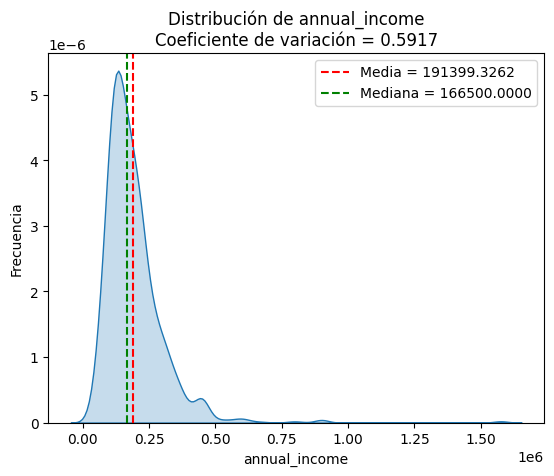

[OK] la media para birthday_count es: -16040.3421
[OK] la mediana para birthday_count es: -15661.5
[OK] el coeficiente de variacion para birthday_count es: -0.2637


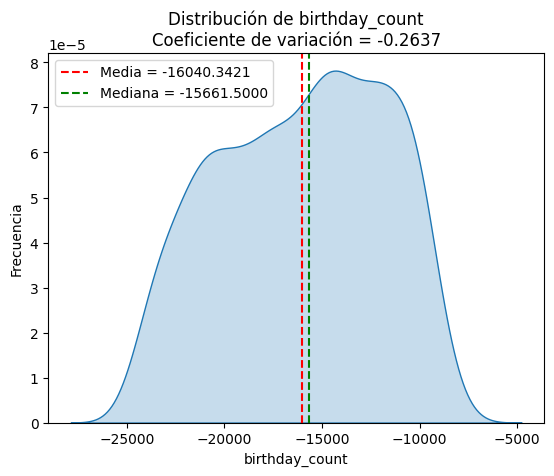

In [10]:
x_barra_annual_income, Med_annual_income, cv_annual_income = cof_variacion_input_nulls('annual_income')
x_barra_birthday_count, Med_birthday_count, cv_birthday_count = cof_variacion_input_nulls('birthday_count')

### Imputación de valores nulos.
- Para la columna con un coeficiente de variación (CV) mayor al 30%, se imputaran en base a la mediana.
- Para la columna con un coeficiente de variación (CV) menor al 30%, se imputaran en base a la media.
- Para la columna cualitativa se imputara con un valor literal 'Desconocido'.
- Para valor fundamental como 'gender', se realiza la eliminación de aquellos registros que no cuenten con esta información.

In [11]:
df['annual_income'] = df['annual_income'].fillna(Med_annual_income)
df['birthday_count'] = df['birthday_count'].fillna(x_barra_birthday_count)
df['type_occupation'] = df['type_occupation'].fillna('Desconocido')
df = df.dropna(subset=['gender'])

### Validación de valores faltantes post-inputación.

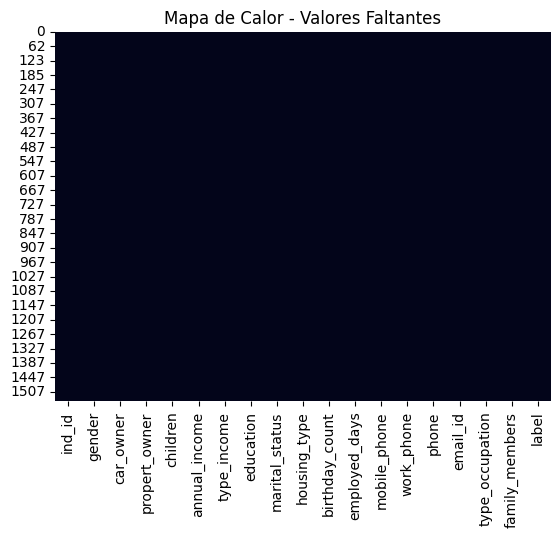

In [12]:
sns.heatmap(
    df.isnull(), cbar=False
)
plt.title('Mapa de Calor - Valores Faltantes')
plt.show()

### Se genera un ciclo para la impresión de las columnas cuantitativas.
Se realiza la representación gráfica de un boxplot para la detección visual de los outliers.

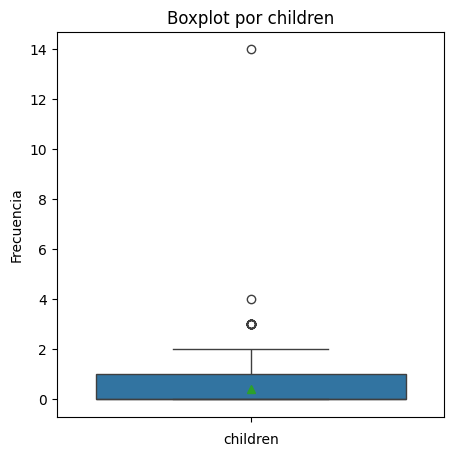

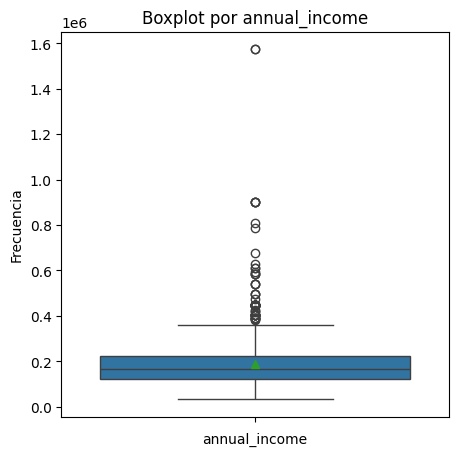

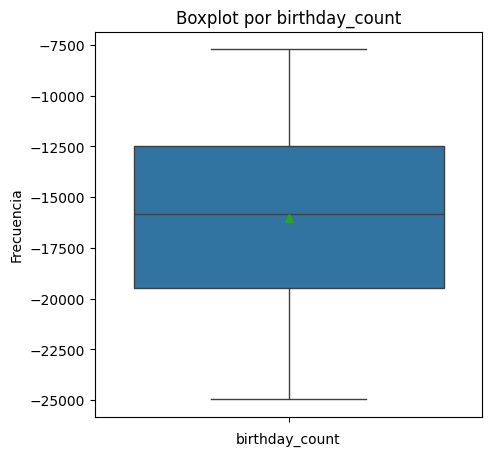

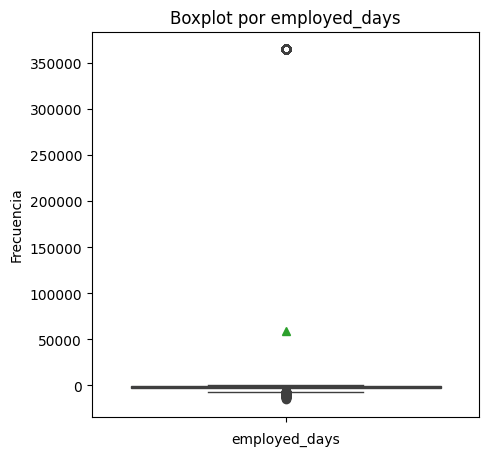

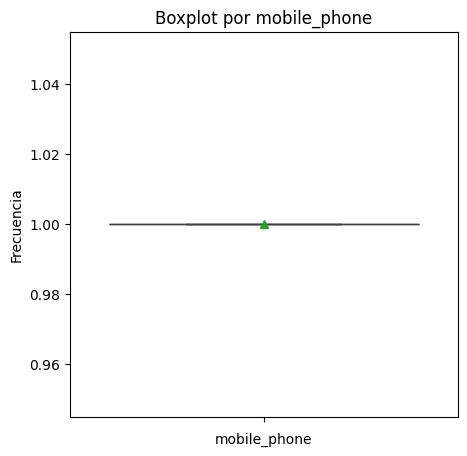

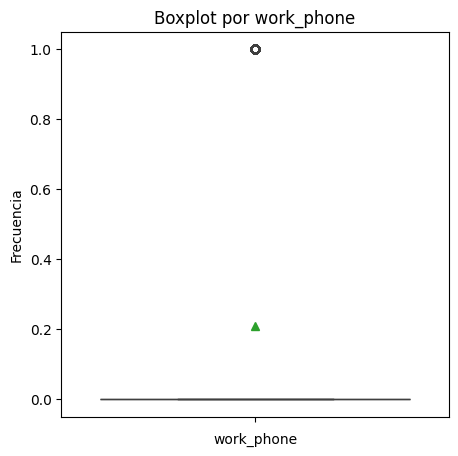

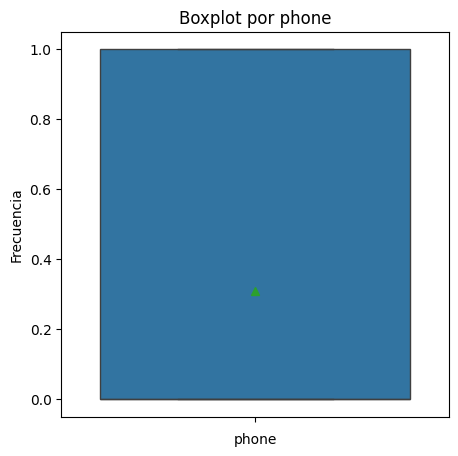

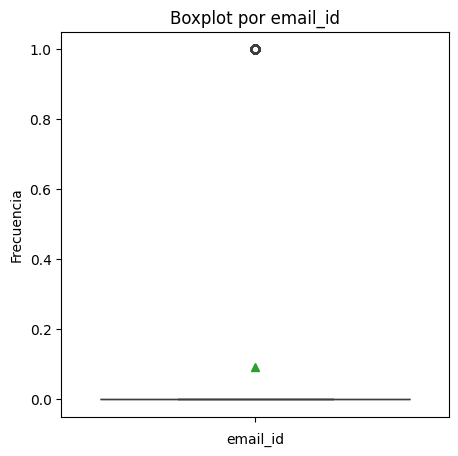

In [13]:
for col in list_cols_cuantitatives:
    plt.figure(figsize=(5,5))
    sns.boxplot(
        df[col],
         showmeans=True
    )
    plt.title(f'Boxplot por {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

### Se valida la cantidad de registros con valores outliers.
Identificamos los outliears fuera de los cuartiles y en base a ello los excluimos.

In [14]:
n = df.shape[0]
for col in list_cols_cuantitatives:

    valores_unicos = set(df[col].dropna().unique())
    if valores_unicos.issubset({0, 1}):
        print(f'\n[INFO] Columna {col} detectada como binaria. Se omite validación de outliers.')
        continue

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1
    li = q1 - 1.5 * iqr
    ls = q3 + 1.5 * iqr

    print(f'\n[INFO] Cuartiles para {col}:')
    print(f'[INFO] Q1: {q1}')
    print(f'[INFO] Q3: {q3}')
    print(f'[INFO] IQR: {iqr}')
    print(f'[INFO] Rango aceptado: [{li}, {ls}]')

    # outliers reales usando IQR
    cant_outliers = df.query(f"{col} < @li or {col} > @ls").shape[0]
    df = df.query(f"label == 1 or (label == 0 and @li <= {col} <= @ls)")

    print(f'[INFO] Cantidad de outliers en {col}: {cant_outliers}')



[INFO] Cuartiles para children:
[INFO] Q1: 0.0
[INFO] Q3: 1.0
[INFO] IQR: 1.0
[INFO] Rango aceptado: [-1.5, 2.5]
[INFO] Cantidad de outliers en children: 18

[INFO] Cuartiles para annual_income:
[INFO] Q1: 121500.0
[INFO] Q3: 225000.0
[INFO] IQR: 103500.0
[INFO] Rango aceptado: [-33750.0, 380250.0]
[INFO] Cantidad de outliers en annual_income: 71

[INFO] Cuartiles para birthday_count:
[INFO] Q1: -19623.5
[INFO] Q3: -12484.25
[INFO] IQR: 7139.25
[INFO] Rango aceptado: [-30332.375, -1775.375]
[INFO] Cantidad de outliers en birthday_count: 0

[INFO] Cuartiles para employed_days:
[INFO] Q1: -3147.5
[INFO] Q3: -412.25
[INFO] IQR: 2735.25
[INFO] Rango aceptado: [-7250.375, 3690.625]
[INFO] Cantidad de outliers en employed_days: 336

[INFO] Columna mobile_phone detectada como binaria. Se omite validación de outliers.

[INFO] Columna work_phone detectada como binaria. Se omite validación de outliers.

[INFO] Columna phone detectada como binaria. Se omite validación de outliers.

[INFO] Column

### Revisión nuevamente de outliers.
Se evidencia correctamente el trato dado a los outliers.

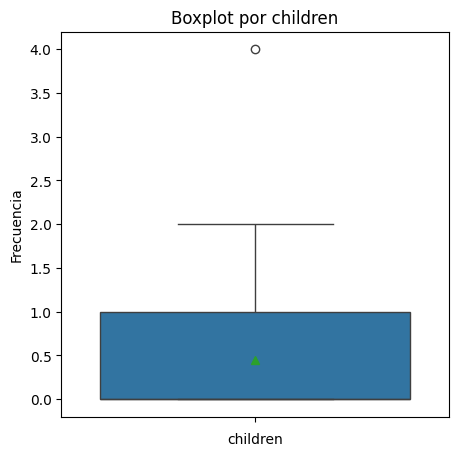

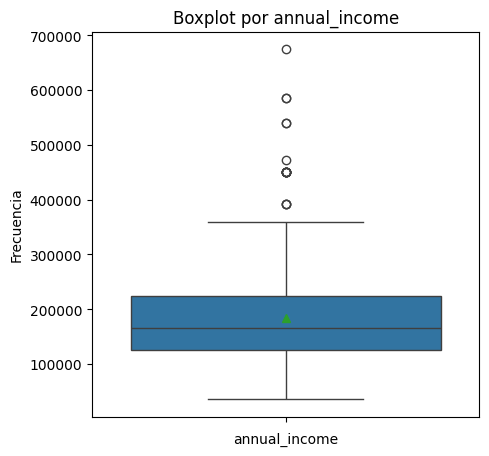

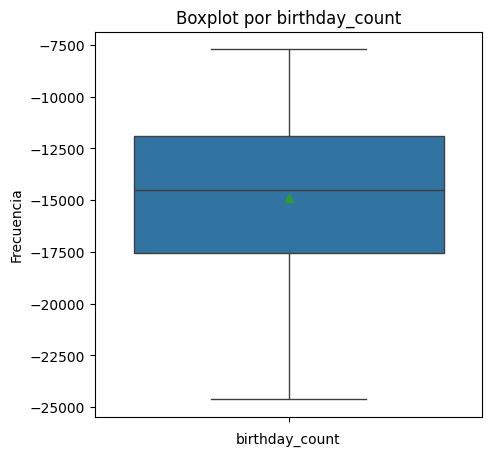

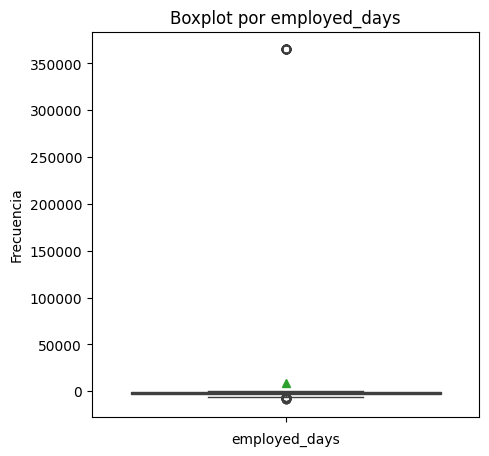

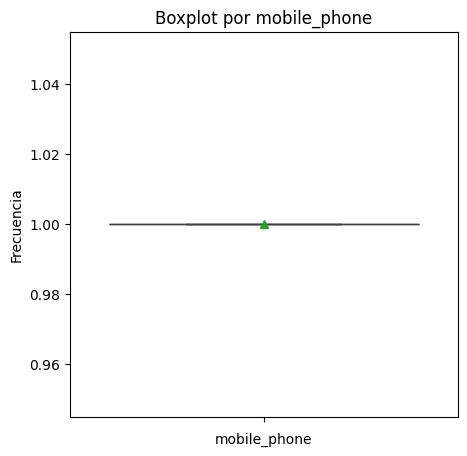

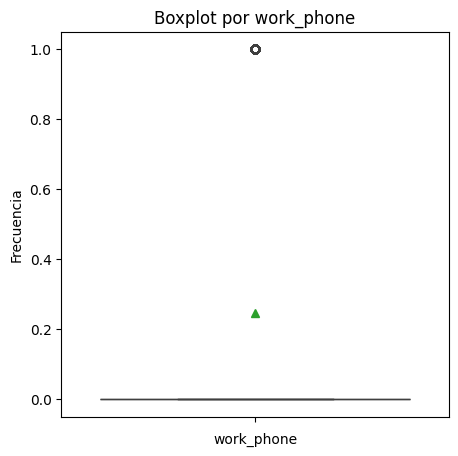

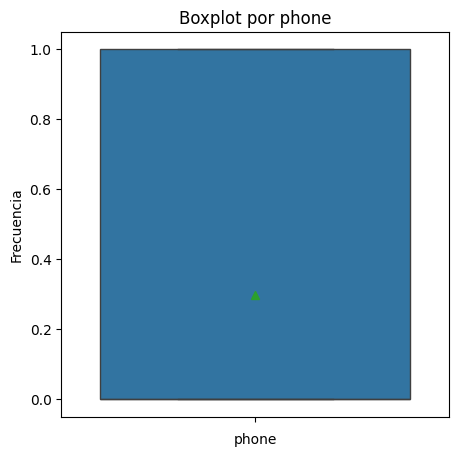

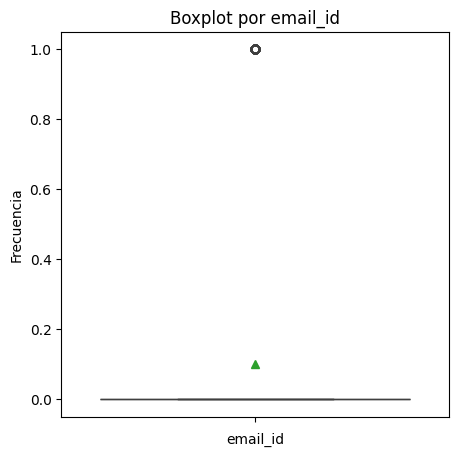

In [15]:
for col in list_cols_cuantitatives:
    plt.figure(figsize=(5,5))
    sns.boxplot(
        df[col],
         showmeans=True
    )
    plt.title(f'Boxplot por {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

### Se valida el ruido de las columnas cuantitativas.
Aquellas con alto ruido (> 50), se agruparán para minimizar el ruido.

In [16]:
df[list_cols_cuantitatives].nunique().sort_values(ascending=False)

birthday_count    963
employed_days     855
annual_income      84
children            4
work_phone          2
phone               2
email_id            2
mobile_phone        1
dtype: int64

### Función para minimizar ruido
Se construye función para poder minizar el ruido en las variables. 

In [17]:
def group_multi_valores(col_value: str, print_statistitcs: bool = False):

    if isinstance(col_value, str):
        list_cols = [col_value]
    else:
        list_cols = col_value

    for col in list_cols:
        
        if print_statistitcs:
            print(f'\n[INFO] tipo de dato de {col} es: {df[col].dtype}')
            print(f'[INFO] valor minimo es {df[col].min()}')
            print(f'[INFO] valor maximo es {df[col].max()}')

        percentiles = df[col].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]).values
        
        p1,p2,p3,p4,p5,p6,p7,p8,p9,p10 = percentiles

        conditions = [
            (df[col] < p1),
            (df[col] >= p1) & (df[col] < p2),
            (df[col] >= p2) & (df[col] < p3),
            (df[col] >= p3) & (df[col] < p4),
            (df[col] >= p4) & (df[col] < p5),
            (df[col] >= p5) & (df[col] < p6),
            (df[col] >= p6) & (df[col] < p7),
            (df[col] >= p7) & (df[col] < p8),
            (df[col] >= p8) & (df[col] < p9),
            (df[col] >= p9) & (df[col] <= p10),
            (df[col] > p10),
        ]

        choices_visual = [
            f'menor a {p1}',
            f'{p1}-{p2}',
            f'{p2}-{p3}',
            f'{p3}-{p4}',
            f'{p4}-{p5}',
            f'{p5}-{p6}',
            f'{p6}-{p7}',
            f'{p7}-{p8}',
            f'{p8}-{p9}',
            f'{p9}-{p10}',
            f'mayor a {p10}',
        ]

        choices_index = [
            1,2,3,4,5,6,7,8,9,10,11
        ]

        df[col] = np.select(conditions, choices_visual, default='sin rango')
        df[col + '_index_cod'] = np.select(conditions, choices_index, default=12).astype('int8')
    
    return df

### Ejecución de la función.

In [18]:
cols_group = ['birthday_count','employed_days','annual_income']
df = group_multi_valores(
    col_value=cols_group,
    print_statistitcs=True
)

print(df[cols_group].nunique().sort_values(ascending=False))
df[cols_group].head(5)


[INFO] tipo de dato de birthday_count es: Float64
[INFO] valor minimo es -24611.0
[INFO] valor maximo es -7705.0

[INFO] tipo de dato de employed_days es: int64
[INFO] valor minimo es -8369
[INFO] valor maximo es 365243

[INFO] tipo de dato de annual_income es: Float64
[INFO] valor minimo es 36000.0
[INFO] valor maximo es 675000.0
birthday_count    10
employed_days     10
annual_income     10
dtype: int64


,birthday_count,employed_days,annual_income
0,-20012.0--18218.0,-285.5-365243.0,180000.0-216000.0
1,-13557.0--12344.0,-622.0--285.5,292500.0-675000.0
2,-16876.0--15670.0,-622.0--285.5,292500.0-675000.0
3,-13557.0--12344.0,-622.0--285.5,166500.0-180000.0
4,-13557.0--12344.0,-622.0--285.5,292500.0-675000.0


### Se procede con la codificación de las columnas cualitativas.
Se les aplicará una codificación tipo LabelEncoder en base a nuestro modelo ya no contamos con columnas ordenales.

In [19]:
print(df[list_cols_cualitativas].nunique().sort_values(ascending=False))
df[list_cols_cualitativas].head()

type_occupation    19
housing_type        6
education           5
marital_status      5
type_income         4
propert_owner       2
gender              2
car_owner           2
dtype: int64


,gender,car_owner,propert_owner,type_income,education,marital_status,housing_type,type_occupation
0,M,Y,Y,Pensioner,Higher education,Married,House / apartment,Desconocido
1,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Desconocido
2,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Desconocido
3,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Desconocido
4,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Desconocido


In [20]:
le = LabelEncoder()
for col in list_cols_cualitativas:
    df[col] = le.fit_transform(df[col])

df.head(5)

,ind_id,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label,birthday_count_index_cod,employed_days_index_cod,annual_income_index_cod
0,5008827,1,1,1,0,180000.0-216000.0,1,1,1,1,-20012.0--18218.0,-285.5-365243.0,1,0,0,0,4,2,1,2,10,7
1,5009744,0,1,0,0,292500.0-675000.0,0,1,1,1,-13557.0--12344.0,-622.0--285.5,1,1,1,0,4,2,1,7,9,10
2,5009746,0,1,0,0,292500.0-675000.0,0,1,1,1,-16876.0--15670.0,-622.0--285.5,1,1,1,0,4,2,1,4,9,10
3,5009749,0,1,0,0,166500.0-180000.0,0,1,1,1,-13557.0--12344.0,-622.0--285.5,1,1,1,0,4,2,1,7,9,6
4,5009752,0,1,0,0,292500.0-675000.0,0,1,1,1,-13557.0--12344.0,-622.0--285.5,1,1,1,0,4,2,1,7,9,10


### Se elimina columnas NO predictorias.

In [21]:
df = df.drop(columns=['ind_id','birthday_count','employed_days','annual_income'])

print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    1176 non-null   int64
 1   car_owner                 1176 non-null   int64
 2   propert_owner             1176 non-null   int64
 3   children                  1176 non-null   int8 
 4   type_income               1176 non-null   int64
 5   education                 1176 non-null   int64
 6   marital_status            1176 non-null   int64
 7   housing_type              1176 non-null   int64
 8   mobile_phone              1176 non-null   int8 
 9   work_phone                1176 non-null   int8 
 10  phone                     1176 non-null   int8 
 11  email_id                  1176 non-null   int8 
 12  type_occupation           1176 non-null   int64
 13  family_members            1176 non-null   int8 
 14  label                     1176 non-null   int

,gender,car_owner,propert_owner,children,type_income,education,marital_status,housing_type,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label,birthday_count_index_cod,employed_days_index_cod,annual_income_index_cod
0,1,1,1,0,1,1,1,1,1,0,0,0,4,2,1,2,10,7
1,0,1,0,0,0,1,1,1,1,1,1,0,4,2,1,7,9,10
2,0,1,0,0,0,1,1,1,1,1,1,0,4,2,1,4,9,10


### Procedemos a validar la correlación entre las variables.

Detallamos variabilidad en los datos.

In [22]:
for col in df.columns:
    print(df[col].value_counts(), "\n")

gender
0    700
1    476
Name: count, dtype: int64 

car_owner
0    678
1    498
Name: count, dtype: int64 

propert_owner
1    733
0    443
Name: count, dtype: int64 

children
0    786
1    261
2    128
4      1
Name: count, dtype: int64 

type_income
3    719
0    330
2     87
1     40
Name: count, dtype: int64 

education
4    756
1    344
2     60
3     15
0      1
Name: count, dtype: int64 

marital_status
1    823
3    175
0     83
2     66
4     29
Name: count, dtype: int64 

housing_type
1    1036
5      72
2      41
4      18
3       6
0       3
Name: count, dtype: int64 

mobile_phone
1    1176
Name: count, dtype: int64 

work_phone
0    888
1    288
Name: count, dtype: int64 

phone
0    827
1    349
Name: count, dtype: int64 

email_id
0    1057
1     119
Name: count, dtype: int64 

type_occupation
9     245
4     233
3     152
15    115
11    114
5      79
7      54
12     40
0      38
17     24
1      22
2      18
13     13
10      9
16      8
18      5
6       3
8      

Eliminamos variables que no tengan varaibilidad (todo 1).

In [23]:
df = df.drop(columns=['mobile_phone'])

### Verificamos correlación con Pearson

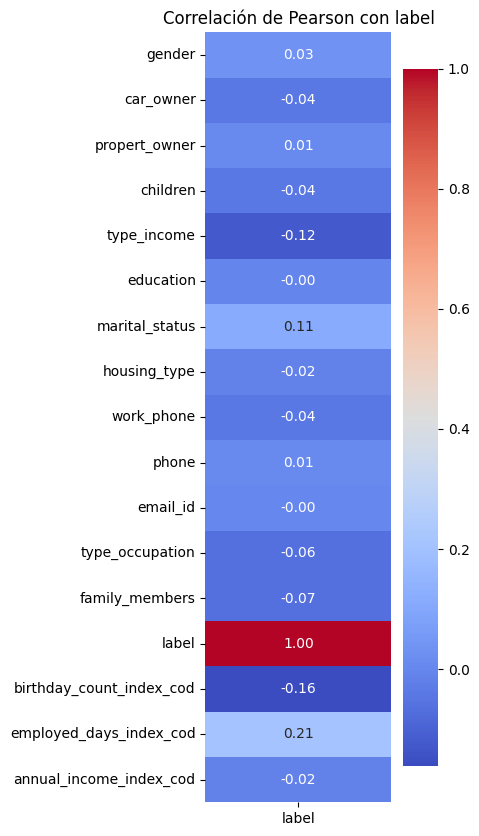

In [24]:
corr = df.corr(method='pearson')[['label']]

plt.figure(figsize=(3, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación de Pearson con label")
plt.show()

### Verificamos correlación con Spearman

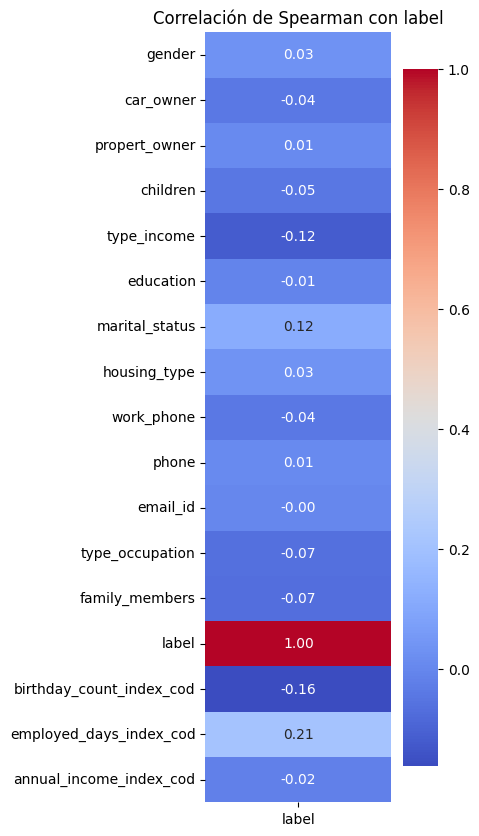

In [25]:
corr = df.corr(method='spearman')[['label']]

plt.figure(figsize=(3, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación de Spearman con label")
plt.show()


### Verificamos Importancia con Chi-cuadrado

            feature           chi2_score     p_value  
14   employed_days_index_cod   77.120491  1.608399e-18
13  birthday_count_index_cod   45.982988  1.192843e-11
4                type_income   15.653490  7.607207e-05
11           type_occupation   11.995133  5.333967e-04
6             marital_status    9.059875  2.612799e-03
3                   children    2.353816  1.249768e-01
12            family_members    1.722137  1.894183e-01
8                 work_phone    1.635785  2.009047e-01
1                  car_owner    1.036597  3.086143e-01
0                     gender    0.651042  4.197404e-01
15   annual_income_index_cod    0.422161  5.158609e-01
7               housing_type    0.229213  6.321080e-01
9                      phone    0.055619  8.135590e-01
2              propert_owner    0.045872  8.304087e-01
5                  education    0.016969  8.963572e-01
10                  email_id    0.002783  9.579255e-01


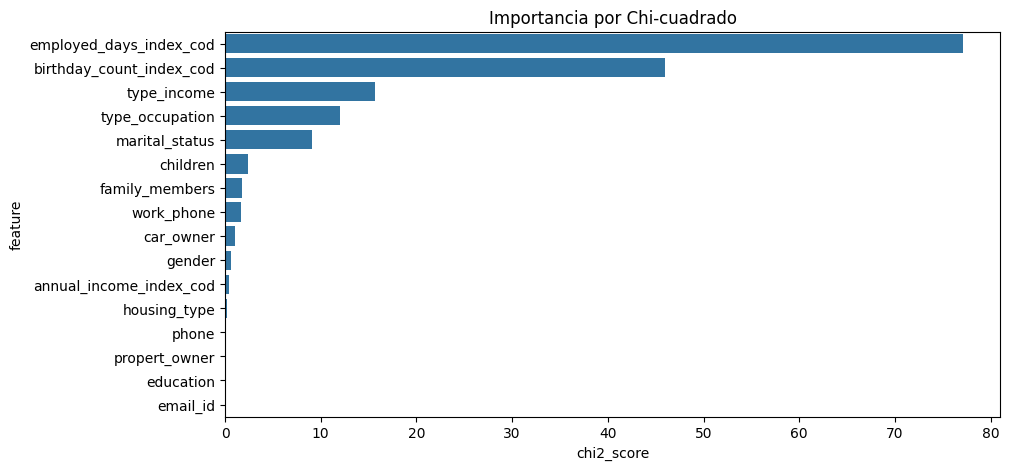

In [26]:
X = df.drop(columns=['label'])
y = df['label']

chi_scores, p_values = chi2(X, y)

results = pd.DataFrame({
    'feature': X.columns,
    'chi2_score': chi_scores,
    'p_value': p_values
})

results = results.sort_values(by='chi2_score', ascending=False)
print(results)

plt.figure(figsize=(10, 5))
sns.barplot(data=results, x='chi2_score', y='feature')
plt.title('Importancia por Chi-cuadrado')
plt.show()

### Validamos el desbalanceo de la información en base a nuestra varaible objetivo 'label'.

In [27]:
df.groupby("label").size()

label
0    1006
1     170
dtype: int64

### Conclusión.

Todas las variables tienen su importancia por lo cual se conservara el DataFrame y se exportará, en base al requerimiento, se empleara un metodo de clasificación binaria XGBoost, y en base a el, se medirá la importancia de las varaibles.

Se contempla el desbalanceo de la variable objetivo y se tratará la información en la implementación del modelo, con la configuración de los hipérparametros.

In [28]:
try:
    df.to_csv(dic_args['path_data_out'], sep=',', index=False)
    print('[OK] DataSet exportados con los transformados preparados para el modelo.')
except Exception as err:
    print(f'[ERROR] error al exportar el DataSet: {err}')

[OK] DataSet exportados con los transformados preparados para el modelo.
